# TP7 Fractales (python)

## I. Flocon de Koch

### 1.1 Fonction procédurale

In [10]:
# Pas d'exemple à tester, ce n'est pas le but

import cmath, numpy
from math import *

def affixe(P):
    return P[0]+1j*P[1]

def point(C):
    return [C.real,C.imag]


### 1.2 Transformation élémentaire

In [11]:
def milieu(M,N): # Utilité ?
    return (affixe(M)+affixe(N))/2

def untiers(M,N):
    return (2*affixe(M)+affixe(N))/3

def deuxtiers(M,N):
    return (affixe(M)+2*affixe(N))/3

def vecteur(N,P):
    return affixe(P)-affixe(N)

def transl(M,NP):
    return affixe(M)+NP

def rotO(M,theta):
    return affixe(M)*numpy.around(cmath.exp(1j*theta), decimals=15)

def rot(N,M,theta):
    return transl(point(rotO(point(transl(N,vecteur(M,[0,0]))),theta)),vecteur([0,0],M))

In [8]:
def elemKoch(L):
    A=L[0]
    B=L[1]
    C=point(untiers(A,B))
    E=point(deuxtiers(A,B))
    D=point(rot(E,C,pi/3))
    return [A,C,D,E,B]

### 1.3 Mise en place

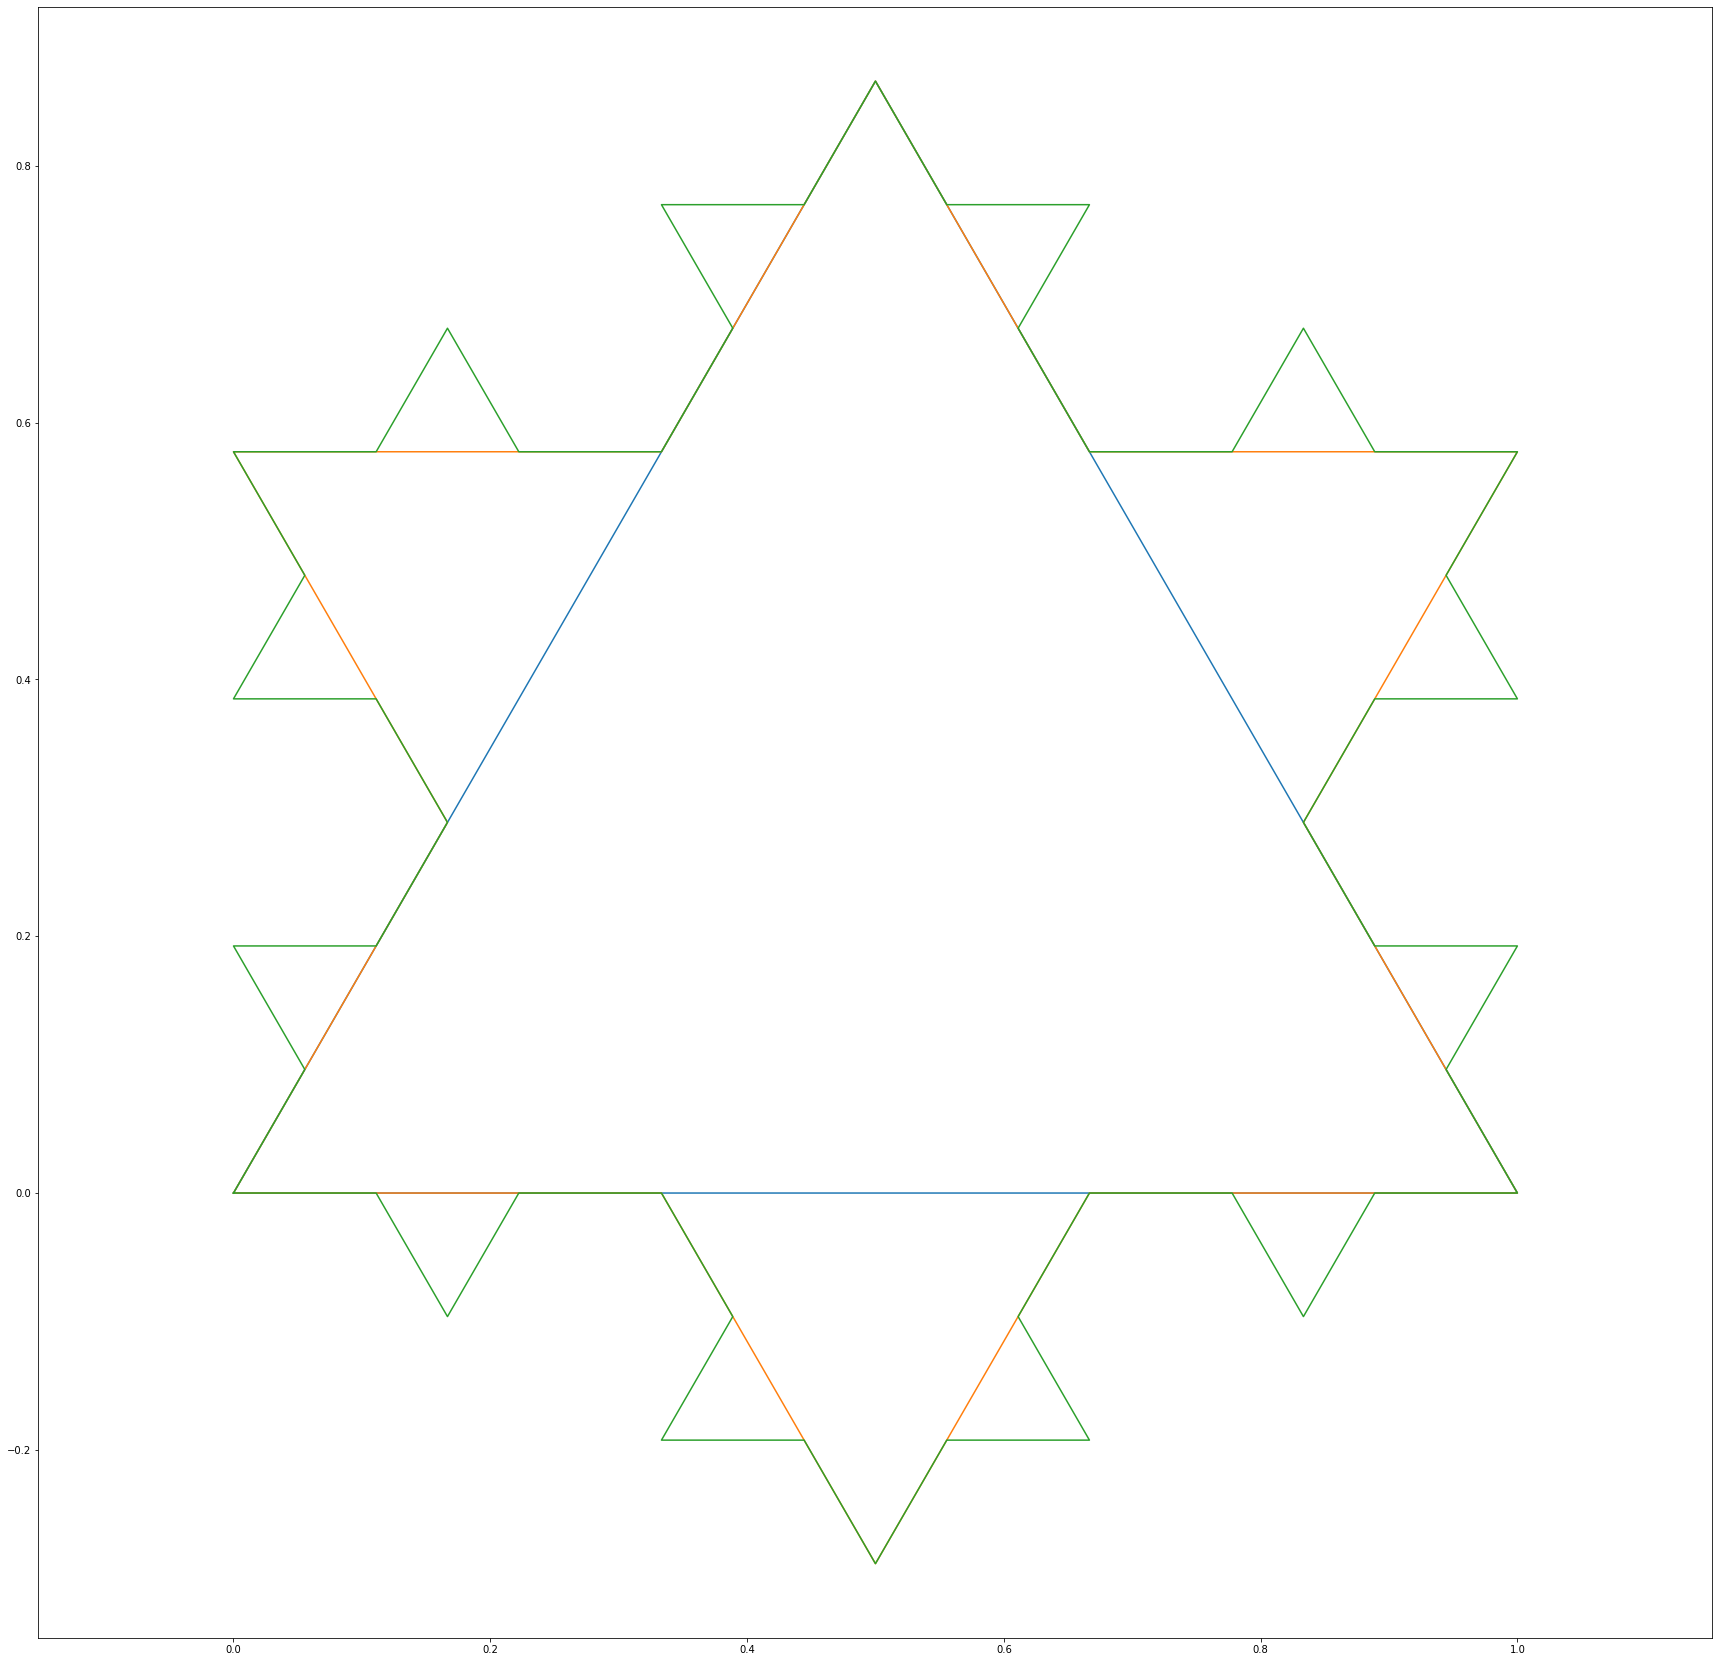

In [12]:
A=[0,0]
B=[1,0]
C=point(rot(B,A,pi/3))
T=[A,C,B,A]

def flocon(d):
    nouvelle_liste=T
    compteur=0
    for i in range(d-1):
        liste=nouvelle_liste
        nouvelle_liste=[liste[0]]
        for j in range(len(liste)-1):
            elem=elemKoch([liste[j],liste[j+1]])
            for k in range(len(elem)-1):
                nouvelle_liste.append(elem[k+1])
    return nouvelle_liste

def get_listes_abs_ord(liste_points): # Inutile pour Maxima
    liste_separee=[list(),list()]
    for i in range(len(liste_points)):
        liste_separee[0].append(liste_points[i][0])
        liste_separee[1].append(liste_points[i][1])
    return liste_separee

from matplotlib import pyplot

pyplot.figure(figsize = (30, 30))
pyplot.axis('equal')

def tracer(d):
    pyplot.plot(get_listes_abs_ord(flocon(d))[0],get_listes_abs_ord(flocon(d))[1])
    
for i in range(3):
    tracer(i+1)